# Data Cleaning & Descriptive Statistics

## Table of Contents

#### 1. Importing Libraries
#### 2. Importing Data
#### 3. Data Cleaning
#### 4. Consistency Checks
#### 5. Descriptive Statistics
#### 6. Exporting Data

# 01. Importing Libraries

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [7]:
# Create path
path = r'C:\Users\16307\Desktop\Tasks - DA Immersion\Gun Violence Analysis'

In [8]:
# Import gun violence data set as dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'gun-violence-data_01-2013_03-2018.csv'))

# 03. Data Cleaning

In [10]:
# Check head
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,1/1/2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,1/1/2013,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,1/1/2013,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,1/5/2013,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,1/7/2013,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [11]:
# Check shape
df.shape

(239677, 29)

## Dropping Columns

In [13]:
# Drop columns
df = df.drop(['address', 'incident_url', 'source_url', 'incident_url_fields_missing', 'incident_characteristics', 'notes', 'sources'], axis=1)

In [14]:
# Check shape again to confirm 7 dropped columns
df.shape

(239677, 22)

# 04. Consistency Checks

## Mixed Types

In [17]:
# Check for mixed types

for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarni

gun_stolen
gun_type


C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)


location_description


C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)


participant_age
participant_age_group
participant_gender


C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)


participant_name
participant_relationship
participant_status
participant_type


C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\16307\AppData\Local\Temp\ipykernel_8936\399198038.py:4: FutureWarni

In [33]:
# Check all data types
print(df.dtypes)

incident_id                   int64
date                         object
state                        object
city_or_county               object
n_killed                      int64
n_injured                     int64
congressional_district      float64
gun_stolen                   object
gun_type                     object
latitude                    float64
location_description         object
longitude                   float64
n_guns_involved             float64
participant_age              object
participant_age_group        object
participant_gender           object
participant_name             object
participant_relationship     object
participant_status           object
participant_type             object
state_house_district        float64
state_senate_district       float64
dtype: object


## Missing Values

In [36]:
# Check for missing values
df.isnull().sum()

incident_id                      0
date                             0
state                            0
city_or_county                   0
n_killed                         0
n_injured                        0
congressional_district       11944
gun_stolen                   99498
gun_type                     99451
latitude                      7923
location_description        197588
longitude                     7923
n_guns_involved              99451
participant_age              92298
participant_age_group        42119
participant_gender           36362
participant_name            122253
participant_relationship    223903
participant_status           27626
participant_type             24863
state_house_district         38772
state_senate_district        32335
dtype: int64

In [40]:
# Drop additional columns
df = df.drop(['participant_name', 'participant_relationship'], axis=1)

In [42]:
# Check shape again
df.shape

(239677, 20)

## Duplicates

In [47]:
# Create a subset containing only rows that are duplicates and print

df_dups = df[df.duplicated()]
df_dups

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,latitude,location_description,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district


##### No duplicates found

## Outliers

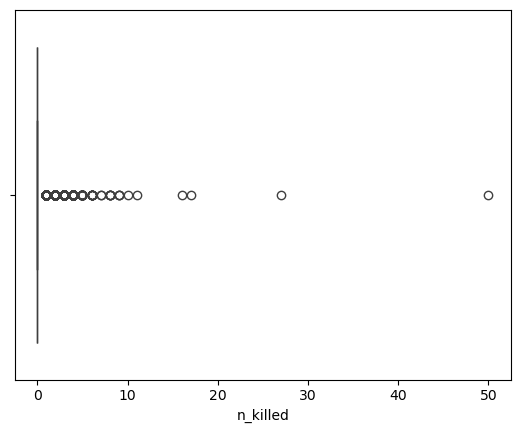

In [58]:
# Check for outliers by creating a box plot for n_killed
sns.boxplot(x=df['n_killed'])
plt.show()

##### Even though there are outliers the data is accurate after cross-checking online

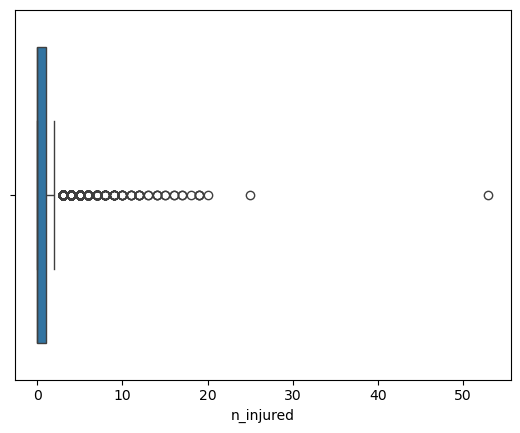

In [62]:
# Check for outliers by creating a box plot for n_injured
sns.boxplot(x=df['n_injured'])
plt.show()

##### Even though there are outliers the data is accurate after cross-checking online

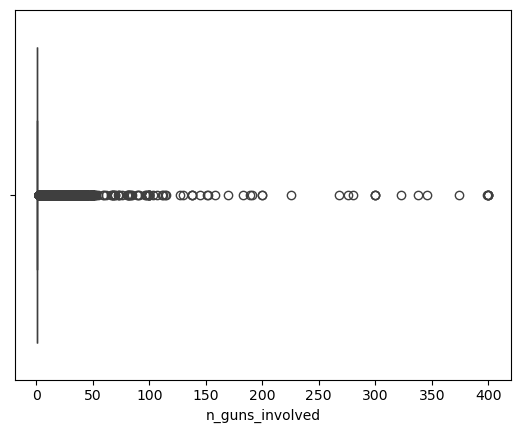

In [66]:
# Check for outliers by creating a box plot for n_guns_involved
sns.boxplot(x=df['n_guns_involved'])
plt.show()

##### The data looks inaccurate but digging deeper into how the data was collected, it includes police seizing guns and other forms of gun collection not necessarily dealing with gun violence

# 05. Descriptive Statistics

In [76]:
# Descriptive statistics for n_killed
df['n_killed'].describe()

count    239677.000000
mean          0.252290
std           0.521779
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          50.000000
Name: n_killed, dtype: float64

In [78]:
# Descriptive statistics for n_injured
df['n_injured'].describe()

count    239677.000000
mean          0.494007
std           0.729952
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          53.000000
Name: n_injured, dtype: float64

In [80]:
# Descriptive statistics for n_guns_involved
df['n_guns_involved'].describe()

count    140226.000000
mean          1.372442
std           4.678202
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         400.000000
Name: n_guns_involved, dtype: float64

# 06. Exporting Data

In [85]:
# Export dataframe 
df.to_csv(os.path.join(path, '02 Data', 'gun_violence_cleaned.csv'))

In [87]:
# Export dataframe
df.to_pickle(os.path.join(path, '02 Data', 'gun_violence_cleaned.pkl'))